### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

### Importing data

In [77]:
df = pd.read_csv('//content/diabetes_012_health_indicators_BRFSS2015.csv')

## EDA

In [3]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df.shape

(253680, 22)

In [6]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


Diabetes_012 feature will be our target feature.

0 - No Diabetes,
1 - PreDiabetes,
2 - Diabetes

Since, the project is about anomality detection we have to make data suitable for binary classification. Therefore we are converting all the values labeled as 2 in Diabetes_012 feature to 1.

In [7]:
df.Diabetes_012.value_counts()

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64

Since, we want to detect outliers therefore for us 

In [78]:
df['Diabetes_012'].values[df['Diabetes_012'].values == 2] = 1

In [9]:
df.Diabetes_012.value_counts()

0.0    213703
1.0     39977
Name: Diabetes_012, dtype: int64

In [10]:
df.isnull().sum().sum()

0

### Visualize the Data

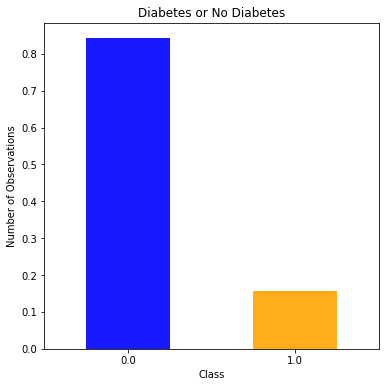

In [81]:
fig = plt.figure(figsize = (6,6))
df.Diabetes_012.value_counts(normalize = True).plot(kind='bar', color= ['blue','orange'], alpha = 0.9, rot=0)
plt.title('Diabetes or No Diabetes')
plt.xlabel("Class")
plt.ylabel("Number of Observations")
plt.show()

Class Imbalance in Data visulaization confirms our data is fine for anomality detection.

### Visualizing data in 2-Dimensions(2-D) 

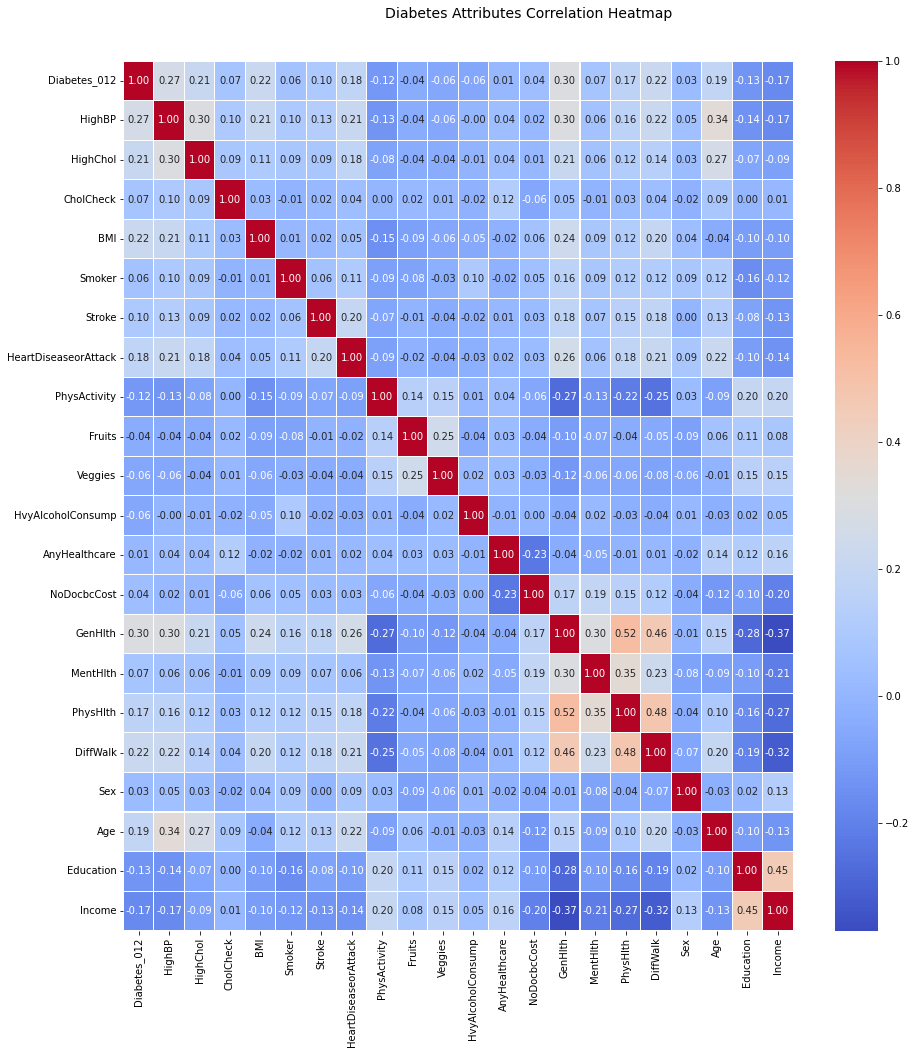

In [12]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 15))
corr = df.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Diabetes Attributes Correlation Heatmap', fontsize=14)

### Pair-wise Scatter plot amongst attributes of interest.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


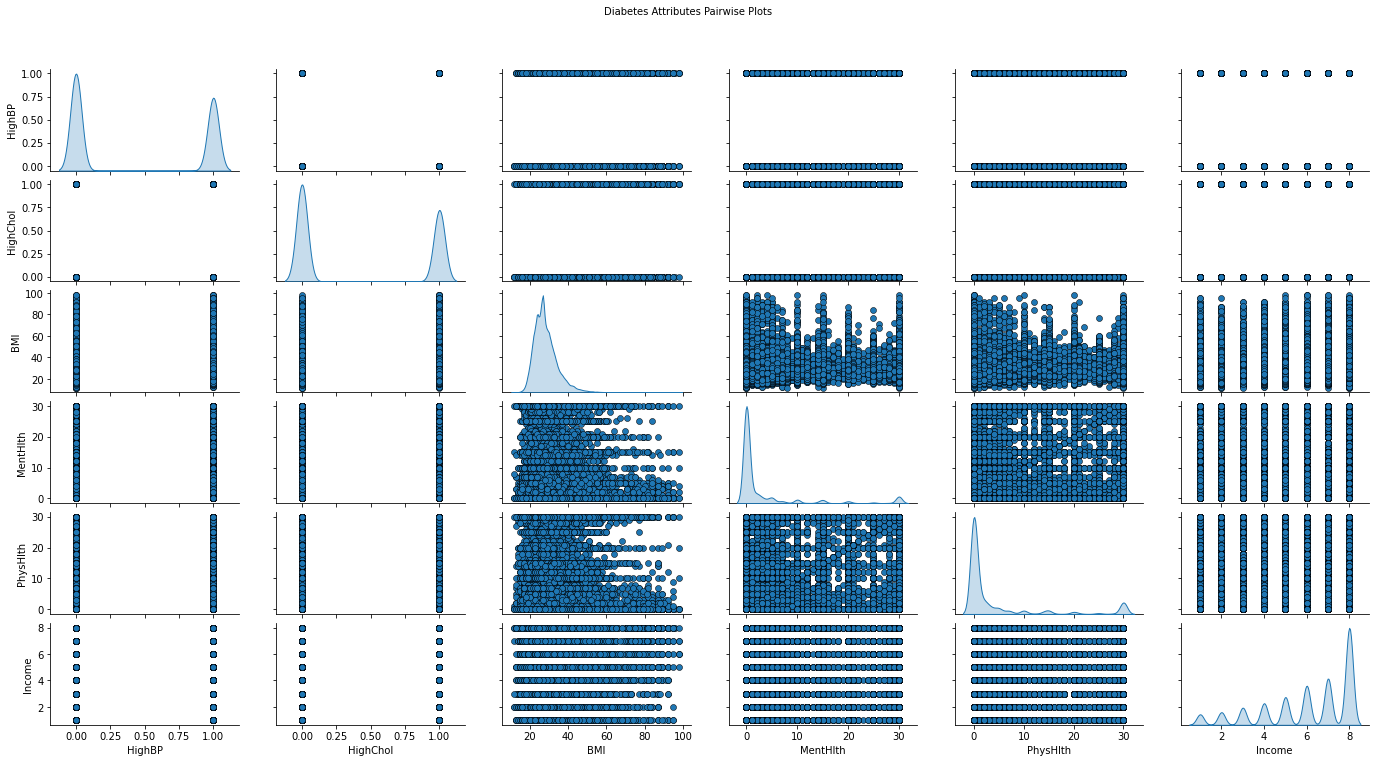

In [13]:
# Pair-wise Scatter Plots
cols = ['HighBP',	'HighChol', 'BMI', 'MentHlth',	'PhysHlth', 'Income']
pp = sns.pairplot(df[cols], size=1.8, aspect=1.8, plot_kws=dict(edgecolor="k", linewidth=0.5), diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.9, wspace=0.2)
t = fig.suptitle('Diabetes Attributes Pairwise Plots', fontsize=10)

##### Count of samples against every age for both classes(labels).

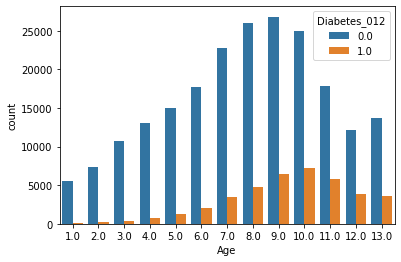

In [79]:
cp = sns.countplot(x="Age", hue="Diabetes_012", data=df)

##### Count of samples against sexes for both classes(labels).

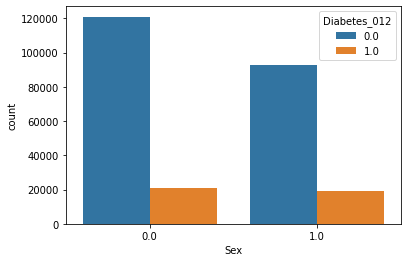

In [80]:
cp = sns.countplot(x="Sex", hue="Diabetes_012", data=df)

#### Normalizing data

Applying MinMaxScaler to all features except Eccentricity and Extent which are already normalized.

In [88]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

df['BMI'] = sc.fit_transform(df['BMI'].values.reshape(-1, 1))
df['MentHlth'] = sc.fit_transform(df['MentHlth'].values.reshape(-1, 1))
df['PhysHlth'] = sc.fit_transform(df['PhysHlth'].values.reshape(-1, 1))
df['DiffWalk'] = sc.fit_transform(df['DiffWalk'].values.reshape(-1, 1))
df['Sex'] = sc.fit_transform(df['Sex'].values.reshape(-1, 1))
df['Age'] = sc.fit_transform(df['Age'].values.reshape(-1, 1))
df['Education'] = sc.fit_transform(df['Education'].values.reshape(-1, 1))
df['Income'] = sc.fit_transform(df['Income'].values.reshape(-1, 1))

In [31]:
labels = df['Diabetes_012']

data = df
data = data.drop(['Diabetes_012'], axis = 1)

Splitting dataset for testing and training.

In [32]:
from sklearn.model_selection import train_test_split

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2, random_state=128)

In [34]:
labels_train = labels_train.astype(bool)
labels_test = labels_test.astype(bool)

#creating NoDiabetes and Diabetes datasets
NoDiabetes_data_train = data_train[~labels_train]
NoDiabetes_data_test = data_test[~labels_test]
Diabetes_data_train = data_train[labels_train]
Diabetes_data_test = data_test[labels_test]

print(" No. of records in Diabetes Train Data =",len(Diabetes_data_train))
print(" No. of records in No Diabetes Train data =",len(NoDiabetes_data_train))
print(" No. of records in Diabetes Test Data =",len(Diabetes_data_test))
print(" No. of records in No Diabetes Test data =",len(NoDiabetes_data_test))

 No. of records in Diabetes Train Data = 32100
 No. of records in No Diabetes Train data = 170844
 No. of records in Diabetes Test Data = 7877
 No. of records in No Diabetes Test data = 42859


Setting training parameter.

In [115]:
nb_epoch = 100
batch_size = 64
input_dim = NoDiabetes_data_train.shape[1]
encoding_dim = 18
hidden_dim_1 = int(encoding_dim / 2)
hidden_dim_2 = 4  
learning_rate = 1e-7

Model Architecture

In [116]:
#input Layer
input_layer = tf.keras.layers.Input(shape=(input_dim, ))

#Encoder
encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh", activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
encoder=tf.keras.layers.Dropout(0.2)(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)

# Decoder
decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
decoder=tf.keras.layers.Dropout(0.2)(decoder)
decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)

#Autoencoder
autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_38 (Dense)            (None, 18)                396       
                                                                 
 dropout_12 (Dropout)        (None, 18)                0         
                                                                 
 dense_39 (Dense)            (None, 9)                 171       
                                                                 
 dense_40 (Dense)            (None, 4)                 40        
                                                                 
 dense_41 (Dense)            (None, 9)                 45        
                                                                 
 dropout_13 (Dropout)        (None, 9)                 0   

In [117]:
cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_diabetes.h5", mode='min', monitor='val_loss', verbose=2, save_best_only=True)

# define our early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=10,
    verbose=1, 
    mode='min',
    restore_best_weights=True)

In [118]:
autoencoder.compile(metrics=['accuracy'], loss='mean_squared_error', optimizer='adam')

In [119]:
history = autoencoder.fit(Diabetes_data_train, Diabetes_data_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(data_test, data_test),
                    verbose=1,
                    callbacks=[cp, early_stop]
                    ).history

Epoch 1/100
495/502 [============================>.] - ETA: 0s - loss: 0.4703 - accuracy: 0.7544
Epoch 1: val_loss improved from inf to 0.27875, saving model to autoencoder_diabetes.h5
502/502 [==============================] - 3s 5ms/step - loss: 0.4696 - accuracy: 0.7573 - val_loss: 0.2788 - val_accuracy: 0.8215
Epoch 2/100
485/502 [===========================>..] - ETA: 0s - loss: 0.4034 - accuracy: 0.9548
Epoch 2: val_loss improved from 0.27875 to 0.25688, saving model to autoencoder_diabetes.h5
502/502 [==============================] - 3s 5ms/step - loss: 0.4033 - accuracy: 0.9540 - val_loss: 0.2569 - val_accuracy: 0.8215
Epoch 3/100
502/502 [==============================] - ETA: 0s - loss: 0.3891 - accuracy: 0.9206
Epoch 3: val_loss improved from 0.25688 to 0.24311, saving model to autoencoder_diabetes.h5
502/502 [==============================] - 4s 8ms/step - loss: 0.3891 - accuracy: 0.9206 - val_loss: 0.2431 - val_accuracy: 0.8154
Epoch 4/100
497/502 [=======================

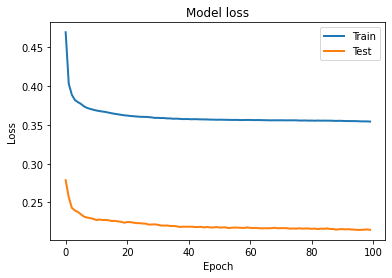

In [120]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [121]:
test_x_predictions = autoencoder.predict(data_test)
mse = np.mean(np.power(data_test - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse, 'True_class': labels_test})

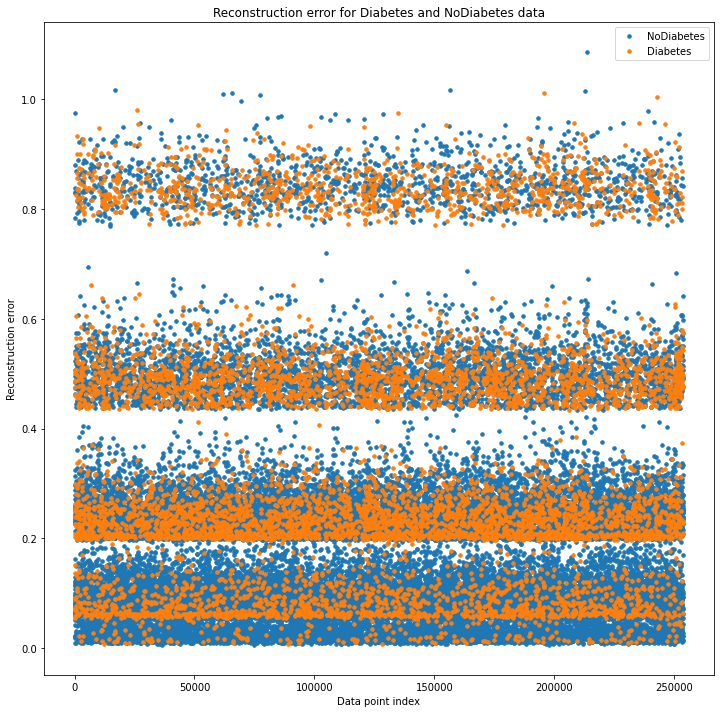

In [122]:
groups = error_df.groupby('True_class')
fig, ax = plt.subplots(figsize=(12, 12))
for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Diabetes" if name == 1 else "NoDiabetes")
ax.legend()
plt.title("Reconstruction error for Diabetes and NoDiabetes data")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")

plt.show();

### Ploting Confusion Matrix and Finding accuracy, recall and precision

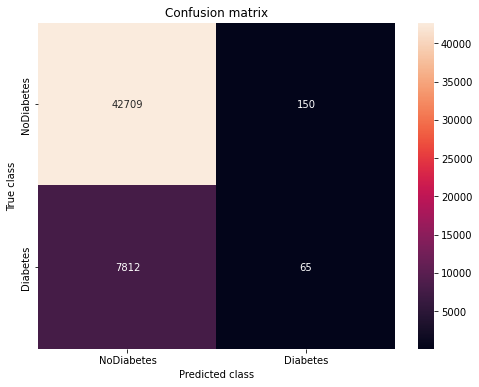

 Accuracy:  0.843070009460738
 Recall:  0.008251872540307223
 Precision:  0.3023255813953488


In [123]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

LABELS = ["NoDiabetes","Diabetes"]

threshold_fixed =0.9
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
error_df['pred'] =pred_y
conf_matrix = confusion_matrix(error_df.True_class, pred_y)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

# print Accuracy, precision and recall
print(" Accuracy: ",accuracy_score(error_df['True_class'], error_df['pred']))
print(" Recall: ",recall_score(error_df['True_class'], error_df['pred']))
print(" Precision: ",precision_score(error_df['True_class'], error_df['pred']))